In [90]:
import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json

import numpy as np
import time
from itertools import groupby
def scroll(driver, timeout):
    # get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        for i in range(timeout):
            # scroll down
            driver.find_element(By.XPATH,"/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table").send_keys(Keys.END)

            # wait for page to load
            time.sleep(1)

        # get new scroll height and compare to last height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height

url = 'https://services1.arcgis.com/99lidPhWCzftIe9K/arcgis/rest/services/HousingUnitInventory/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json'
url1= 'https://opendata.gis.utah.gov/datasets/utah::utah-housing-unit-inventory/about'
turl = "https://www.aicrowd.com/challenges/insurance-pricing-game/submissions"

In [68]:
driver.get(url)

In [69]:
pre = driver.find_element(By.TAG_NAME,"pre").text
data = json.loads(pre)

df = pd.json_normalize(data['features'])

new_column_names = {col: col.replace('attributes.', '') for col in df.columns}
df.rename(columns=new_column_names, inplace=True)
df.set_index('OBJECTID', inplace=True)

In [70]:
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,
1,1,single_family,single_family,1,18,9.339,1.927313,26873,4935167,2002,2000,Woods Cross,Davis,South Davis County,13663.433594,576.740589
2,2,single_family,single_family,1,34,5.609,6.061556,47226,10518205,2007,2000,Centerville,Davis,South Davis County,43042.921875,934.399608
3,3,single_family,single_family,1,40,9.383,4.263039,52295,9844160,2007,2000,Centerville,Davis,South Davis County,30273.128906,1323.902677
4,4,single_family,single_family,1,29,4.463,6.497216,55105,12752774,2016,2010,Centerville,Davis,South Davis County,46168.941406,925.352925
5,5,single_family,single_family,1,24,6.170,3.890075,19183,4691610,2011,2010,Farmington,Davis,South Davis County,27656.757812,738.090710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,single_family,single_family,0,1,4.751,0.210503,1515,347000,1976,1970,North Salt Lake,Davis,South Davis County,1490.750000,154.555647
1997,1997,single_family,single_family,0,1,4.697,0.212897,1470,341000,1976,1970,North Salt Lake,Davis,South Davis County,1507.695312,157.908761
1998,1998,single_family,single_family,0,1,4.683,0.213535,1477,326000,1976,1970,North Salt Lake,Davis,South Davis County,1512.195312,158.134178


In [85]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get(url1)

In [86]:
driver.find_element(By.ID,"ember99").click()


In [87]:
table =driver.find_element(By.XPATH,"/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table") 
table

<selenium.webdriver.remote.webelement.WebElement (session="40a6ce48e958ab31b0b9b5c9df186455", element="F52F23C00A0F7F69ACAB7F095E22DAC4_element_46")>

In [23]:
table.send_keys(Keys.PAGE_DOWN)

In [91]:
def get_all_rows(driver, table_locator):
    # Scroll to the bottom of the page to ensure all rows are loaded
    last_row_count = 0

    while True:
        # Record the current number of rows
        current_row_count = len(driver.find_elements(By.XPATH, table_locator + "//tr"))

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait for a short time to let new rows load
        scroll(driver,10)

        # Get the new number of rows
        new_row_count = len(driver.find_elements(By.XPATH, table_locator + "//tr"))

        # If the number of rows hasn't increased, break the loop
        if new_row_count == current_row_count:
            break

        # Update the last row count
        last_row_count = new_row_count

    html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the table in the parsed HTML
    table = soup.find('table')

    # Check if the table was found
    if table:
        # Extract all rows from the table
        all_rows = table.find_all('tr')
        return all_rows
    else:
        print("Table not found.")
        return []    


# Replace with the correct XPath or other locator for your table
table_locator = "/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table"

all_rows = get_all_rows(driver, table_locator)

# Now 'all_rows' contains all the rows in the table
len(all_rows)

10126

In [81]:
all_rows1=all_rows

In [47]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

def get_all_rows(driver, table_locator):
    # Scroll to the bottom of the page to ensure all rows are loaded
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a moment to ensure the content is loaded
    time.sleep(2)

    # Get the HTML of the entire page
    html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the table in the parsed HTML
    table = soup.find('table')

    # Check if the table was found
    if table:
        # Extract all rows from the table
        all_rows = table.find_all('tr')
        return all_rows
    else:
        print("Table not found.")
        return []


# Replace with the correct XPath or other locator for your table
table_locator = "/html/body/div[7]/div[2]/div/div[1]/div[3]/div/div/div[2]/div/table"

all_rows = get_all_rows(driver, table_locator)

# Now 'all_rows' contains all the rows in the table
for row in all_rows:
    print(row.text)







    UNIT_ID
  




    TYPE
  




    SUBTYPE
  




    IS_OUG
  




    UNIT_COUNT
  




    DUA
  




    ACRES
  




    TOT_BD_FT2
  




    TOT_VALUE
  




    APX_BLT_YR
  




    BLT_DECADE
  




    CITY
  




    COUNTY
  




    SUBCOUNTY
  




    Shape__Area
  




    Shape__Length
  



1
single_family
single_family
1
18
9.339
1.927
26,873
4,935,167
2,002
2,000
Woods Cross
Davis
South Davis County
13,663.434
576.741


2
single_family
single_family
1
34
5.609
6.062
47,226
10,518,205
2,007
2,000
Centerville
Davis
South Davis County
43,042.922
934.4


3
single_family
single_family
1
40
9.383
4.263
52,295
9,844,160
2,007
2,000
Centerville
Davis
South Davis County
30,273.129
1,323.903


4
single_family
single_family
1
29
4.463
6.497
55,105
12,752,774
2,016
2,010
Centerville
Davis
South Davis County
46,168.941
925.353


5
single_family
single_family
1
24
6.17
3.89
19,183
4,691,610
2,011
2,010
Farmington
Davis
South Davis County
27,656.758
738.091


6
single_fam

In [44]:
len(all_rows)

26

In [30]:
scroll(driver,1000)

KeyboardInterrupt: 

In [4]:
driver.find_element(By.ID,"ember262").click()

In [10]:
driver.find_elements(By.TAG_NAME,'calcite-button')[1].click()

IndexError: list index out of range

In [90]:
scroll(driver,10)

In [53]:
import pandas as pd
import numpy as np
import time
from itertools import groupby
def scroll(driver, timeout):
    # get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        for i in range(timeout):
            # scroll down
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # wait for page to load
            time.sleep(1)

        # get new scroll height and compare to last height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height

In [51]:
use_element = driver.find_element(By.XPATH,'//*[@id="ember262"]/use')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="ember262"]/use"}
  (Session info: chrome=120.0.6099.71); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x0000000100fcc4cc chromedriver + 4162764
1   chromedriver                        0x0000000100fc4654 chromedriver + 4130388
2   chromedriver                        0x0000000100c1bbc0 chromedriver + 293824
3   chromedriver                        0x0000000100c62040 chromedriver + 581696
4   chromedriver                        0x0000000100ca1ab0 chromedriver + 842416
5   chromedriver                        0x0000000100c556bc chromedriver + 530108
6   chromedriver                        0x0000000100c56930 chromedriver + 534832
7   chromedriver                        0x0000000100f91df8 chromedriver + 3923448
8   chromedriver                        0x0000000100f963cc chromedriver + 3941324
9   chromedriver                        0x0000000100f7a028 chromedriver + 3825704
10  chromedriver                        0x0000000100f96f2c chromedriver + 3944236
11  chromedriver                        0x0000000100f6c6e4 chromedriver + 3770084
12  chromedriver                        0x0000000100fb3970 chromedriver + 4061552
13  chromedriver                        0x0000000100fb3ae8 chromedriver + 4061928
14  chromedriver                        0x0000000100fc42d4 chromedriver + 4129492
15  libsystem_pthread.dylib             0x0000000189e89034 _pthread_start + 136
16  libsystem_pthread.dylib             0x0000000189e83e3c thread_start + 8


In [27]:
pre = driver.find_element(By.TAG_NAME,"pre").text
data = json.loads(pre)
print(pre)

{"objectIdFieldName":"OBJECTID","uniqueIdField":{"name":"OBJECTID","isSystemMaintained":true},"globalIdFieldName":"","geometryProperties":{"shapeAreaFieldName":"Shape__Area","shapeLengthFieldName":"Shape__Length","units":"esriMeters"},"geometryType":"esriGeometryPolygon","spatialReference":{"wkid":4326,"latestWkid":4326},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"OBJECTID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"UNIT_ID","type":"esriFieldTypeInteger","alias":"UNIT_ID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"TYPE","type":"esriFieldTypeString","alias":"TYPE","sqlType":"sqlTypeOther","length":26,"domain":null,"defaultValue":null},{"name":"SUBTYPE","type":"esriFieldTypeString","alias":"SUBTYPE","sqlType":"sqlTypeOther","length":44,"domain":null,"defaultValue":null},{"name":"IS_OUG","type":"esriFieldTypeString","alias":"IS_OUG","sqlType":"sqlTypeOther","length":2,"domain":null,"defaultValue":null},{"name":"UNIT_C

In [28]:
df = pd.json_normalize(data['features'])
new_column_names = {col: col.replace('attributes.', '') for col in df.columns}
df.rename(columns=new_column_names, inplace=True)
df.set_index('OBJECTID', inplace=True)


In [29]:
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,
1,1,single_family,single_family,1,18,9.339,1.927313,26873,4935167,2002,2000,Woods Cross,Davis,South Davis County,13663.433594,576.740589
2,2,single_family,single_family,1,34,5.609,6.061556,47226,10518205,2007,2000,Centerville,Davis,South Davis County,43042.921875,934.399608
3,3,single_family,single_family,1,40,9.383,4.263039,52295,9844160,2007,2000,Centerville,Davis,South Davis County,30273.128906,1323.902677
4,4,single_family,single_family,1,29,4.463,6.497216,55105,12752774,2016,2010,Centerville,Davis,South Davis County,46168.941406,925.352925
5,5,single_family,single_family,1,24,6.170,3.890075,19183,4691610,2011,2010,Farmington,Davis,South Davis County,27656.757812,738.090710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,single_family,single_family,0,1,4.751,0.210503,1515,347000,1976,1970,North Salt Lake,Davis,South Davis County,1490.750000,154.555647
1997,1997,single_family,single_family,0,1,4.697,0.212897,1470,341000,1976,1970,North Salt Lake,Davis,South Davis County,1507.695312,157.908761
1998,1998,single_family,single_family,0,1,4.683,0.213535,1477,326000,1976,1970,North Salt Lake,Davis,South Davis County,1512.195312,158.134178


In [18]:
r = requests.get(url)
r.text


'{"objectIdFieldName":"OBJECTID","uniqueIdField":{"name":"OBJECTID","isSystemMaintained":true},"globalIdFieldName":"","geometryProperties":{"shapeAreaFieldName":"Shape__Area","shapeLengthFieldName":"Shape__Length","units":"esriMeters"},"geometryType":"esriGeometryPolygon","spatialReference":{"wkid":4326,"latestWkid":4326},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"OBJECTID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"UNIT_ID","type":"esriFieldTypeInteger","alias":"UNIT_ID","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"TYPE","type":"esriFieldTypeString","alias":"TYPE","sqlType":"sqlTypeOther","length":26,"domain":null,"defaultValue":null},{"name":"SUBTYPE","type":"esriFieldTypeString","alias":"SUBTYPE","sqlType":"sqlTypeOther","length":44,"domain":null,"defaultValue":null},{"name":"IS_OUG","type":"esriFieldTypeString","alias":"IS_OUG","sqlType":"sqlTypeOther","length":2,"domain":null,"defaultValue":null},{"name":"UNIT_

In [3]:
url1 = "https://services1.arcgis.com/99lidPhWCzftIe9K/arcgis/rest/services/HousingUnitInventory/FeatureServer/0/query?outFields=*&where=1%3D1"
r= requests.get(url1)
r.text

'<html lang="en">\r\n<head>\r\n  <title>Query: HousingUnitInventory (ID: 0)</title>\r\n  <link href=\'/ESRI.ArcGIS.SDS.REST.css\' rel=\'stylesheet\' type=\'text/css\'>\r\n  <link rel=\'SHORTCUT ICON\' href=\'/favicon.ico\'>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/> \r\n</head>\r\n<body>\r\n<table width="100%" id="userTable" class="userTable">\r\n<tr>\r\n<td class="titlecell">ArcGIS REST Services Directory</td>\r\n</tr>\r\n</table>\r\n<table id="navTable" class="navTable" width="100%">\r\n<tbody>\r\n<tr valign="top">\r\n<td class="breadcrumbs">\r\n<span id="homeBreadcrumbs"><a href="/99lidPhWCzftIe9K/ArcGIS/rest/services">Home</a> > <a href="/99lidPhWCzftIe9K/ArcGIS/rest/services">services</a> </span>> <a href="/99lidPhWCzftIe9K/ArcGIS/rest/services/HousingUnitInventory/FeatureServer">HousingUnitInventory (FeatureServer)</a> > <a href="/99lidPhWCzftIe9K/ArcGIS/rest/services/HousingUnitInventory/FeatureServer/0">HousingUnitInventory</a> > <a href="/99lidPhWC

In [3]:
df = pd.read_csv('./Utah_Housing_Unit_Inventory.csv',index_col='OBJECTID')
df

,UNIT_ID,TYPE,SUBTYPE,IS_OUG,UNIT_COUNT,DUA,ACRES,TOT_BD_FT2,TOT_VALUE,APX_BLT_YR,BLT_DECADE,CITY,COUNTY,SUBCOUNTY,SHAPE_Length,SHAPE_Area
OBJECTID,,,,,,,,,,,,,,,,
1,1,single_family,single_family,1,18,9.339,1.927313,26873.0,4935167.0,2002.0,2000,Woods Cross,Davis,South Davis County,576.740589,13663.427336
2,2,single_family,single_family,1,34,5.609,6.061556,47226.0,10518205.0,2007.0,2000,Centerville,Davis,South Davis County,934.399608,43042.936195
3,3,single_family,single_family,1,40,9.383,4.263039,52295.0,9844160.0,2007.0,2000,Centerville,Davis,South Davis County,1323.902677,30273.131808
4,4,single_family,single_family,1,29,4.463,6.497216,55105.0,12752774.0,2016.0,2010,Centerville,Davis,South Davis County,925.352925,46168.938217
5,5,single_family,single_family,1,24,6.170,3.890075,19183.0,4691610.0,2011.0,2010,Farmington,Davis,South Davis County,738.090710,27656.784835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391841,391841,multi_family,apartment,0,47,29.250,1.606838,22716.0,2827583.0,1993.0,1990,Clinton,Davis,North Davis County,477.329147,11482.698461
391842,391842,multi_family,apartment,0,65,57.450,1.131428,49324.0,5329100.0,1991.0,1990,Salt Lake City,Salt Lake,North Salt Lake County,401.037532,7983.025250
391843,391843,multi_family,apartment,0,187,14.627,12.784790,NaN,NaN,2019.0,2010,West Jordan,Salt Lake,Southwest Salt Lake County,1382.894989,89915.011776


In [14]:
sns.pairplot(df)

KeyboardInterrupt: 

In [23]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot)

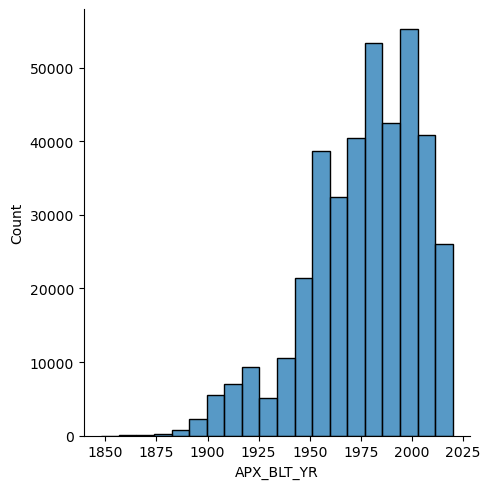

In [6]:
sns.displot(df,x='APX_BLT_YR',bins=20)